In [2]:
import pandas as pd
import numpy as np

In [104]:
tweet = pd.read_csv("C:\\Users\\hp\\Downloads\\Elon_musk.csv")
tweet

,Unnamed: 0,Text
0,1,@kunalb11 I�m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [105]:
tweet.isnull().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [106]:
# there are no any empty rows

In [107]:
# Now we will remove the space at the starting and ending of each tweet :-

tweet = [i.strip() for i in tweet.Text]

###   joinng the tweets :-

In [ ]:

tweets = ' '.join(tweet)

# converting the tweets in lower-case :-

tweets.lower()


### removing punctuation :-

In [108]:
import string

In [ ]:
no_punc_tweet = tweets.translate(str.maketrans(' ',' ',string.punctuation))
no_punc_tweet.lower()

### Tokenization :-

In [38]:
import nltk
from nltk.tokenize import word_tokenize

In [39]:
tweet_token = word_tokenize(no_punc_tweet.lower())
tweet_token[0:10]

['kunalb11',
 'i�m',
 'an',
 'alien',
 'idaacarmack',
 'ray',
 'tracing',
 'on',
 'cyberpunk',
 'with']

In [40]:
len(tweet_token)

21122

### Removing stop-words :-

In [41]:
from nltk.corpus import stopwords

In [42]:
my_stop_words = stopwords.words('english')

In [43]:
stopword = pd.read_csv("C:\\Users\\RUSHIKESH\\Downloads\\stop.txt")

# above list of stop-word is given in the question hence add this stopds to the stopwords from english


In [44]:
my_stop_words.extend(stopword)

In [45]:
no_stop_token = [word for word in tweet_token if not word in my_stop_words]
no_stop_token[0:10]

['kunalb11',
 'i�m',
 'alien',
 'idaacarmack',
 'ray',
 'tracing',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'tried']

In [46]:
len(no_stop_token)

15024

### Stemming :-

In [47]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

stem_token = [ps.stem(word) for word in no_stop_token]
stem_token[0:10]

['kunalb11',
 'i�m',
 'alien',
 'idaacarmack',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'tri']

In [48]:
len(stem_token)

15024

### Feature Extraction using count-vectorizer :-

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [50]:
X = vectorizer.fit_transform(stem_token)

In [ ]:
vectorizer.vocabulary_[0:10]

In [ ]:
vectorizer.get_feature_names()


### Visualization :-

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread


In [54]:
wordcloud = WordCloud(width=3000, height=2000, stopwords=my_stop_words, background_color='black', 
                      max_words=100, colormap='Set2').generate(no_punc_tweet)

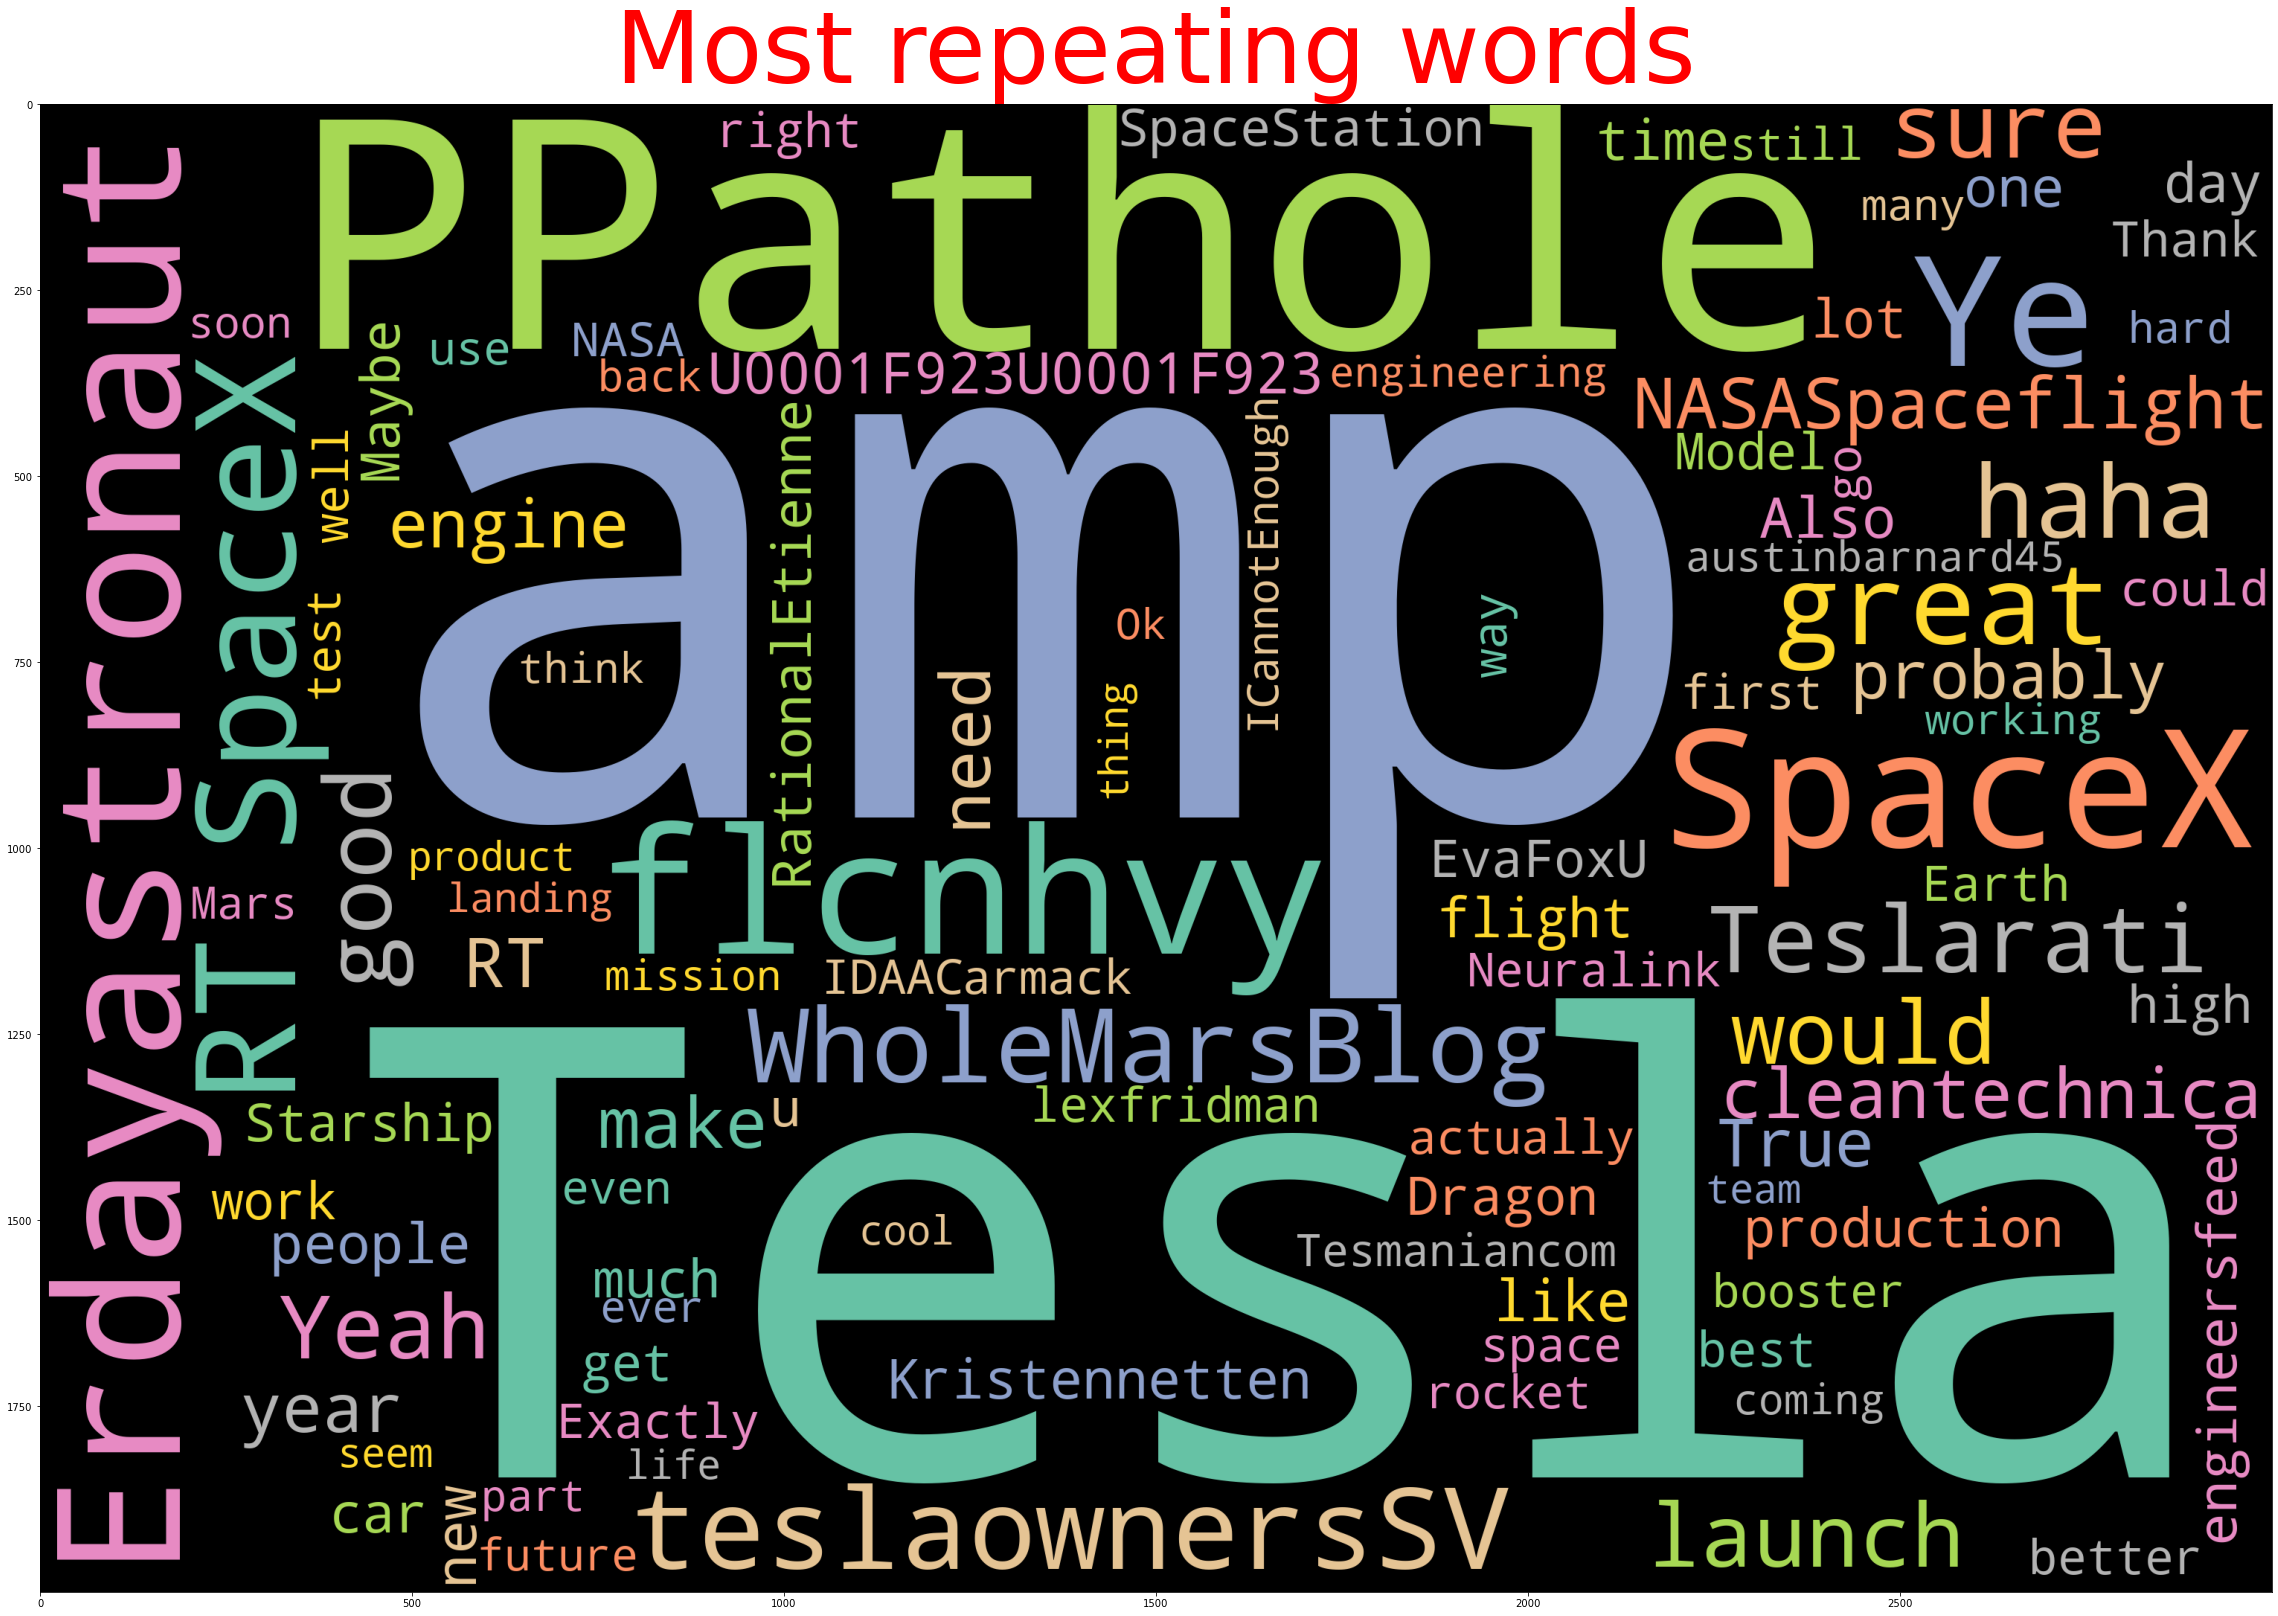

In [55]:
plt.figure(figsize=(40,30))
plt.title('Most repeating words',fontsize=100, color='red')
plt.imshow(wordcloud)

### Sentimental Analysis :-

In [56]:
afinn = pd.read_csv("C:\\Users\\RUSHIKESH\\Downloads\Afinn.csv")
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [ ]:
import nltk
import spacy

from nltk import tokenize

sentences = tokenize.sent_tokenize(' '.join(tweet))
sentences

In [58]:
sent_df = pd.DataFrame(sentences, columns=['sentences'])
sent_df

,sentences
0,@kunalb11 I�m an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
909,"@kenyanwalstreet Not actually a payout, just a..."
910,"It may never pay out, as the stock can�t b� ht..."
911,Details Aug 28.
912,AI symbiosis while u wait @vistacruiser7 @flcn...


In [59]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [63]:
nlp = spacy.load('en_core_web_sm')

In [64]:
def calculate_sentiment(text: str=None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += affinity_scores.get(word.lemma_,0)  
            
            
    return sent_score
    

In [65]:
sent_df['sentiment_values'] = sent_df['sentences'].apply(calculate_sentiment)
sent_df

,sentences,sentiment_values
0,@kunalb11 I�m an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge is underestimated @teslacn Congr...,3
4,Now on to the next for even more!!,0
...,...,...
909,"@kenyanwalstreet Not actually a payout, just a...",0
910,"It may never pay out, as the stock can�t b� ht...",-4
911,Details Aug 28.,0
912,AI symbiosis while u wait @vistacruiser7 @flcn...,-2


In [66]:
sent_df['words']=sent_df['sentences'].str.split().apply(len)
sent_df

,sentences,sentiment_values,words
0,@kunalb11 I�m an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
4,Now on to the next for even more!!,0,8
...,...,...,...
909,"@kenyanwalstreet Not actually a payout, just a...",0,11
910,"It may never pay out, as the stock can�t b� ht...",-4,31
911,Details Aug 28.,0,3
912,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [67]:
sent_df['sentiment_values'].describe()

count    914.000000
mean       1.374179
std        2.704916
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       16.000000
Name: sentiment_values, dtype: float64

In [68]:
# mean is postiive means most of the tweets are in positive only 

In [111]:
sent_df[sent_df['sentiment_values']>=15]

# the list of tweet which are most positive :-

,sentences,sentiment_values,words,sr_no
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,231,37
104,@Erdayastronaut @SpaceX Was also thinking that...,16,94,105
710,We just haven�t observed the� https://t.co/mez...,15,72,711


In [110]:
sent_df[sent_df['sentiment_values']<=-5]

# the list of tweet which are more negative :-

,sentences,sentiment_values,words,sr_no
64,"Also, the road to hell is mostly paved with ba...",-7,11,65
473,"He plays the �poor inventor� card, but was ric...",-5,34,474
640,Very ba� https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60,641
828,Cool Model 3 review by @iamjamiefoxx https://t...,-7,61,829


### Visulatization :- 

In [83]:
sent_df['sr_no'] = pd.Series(range(1,915))


In [84]:
import seaborn as sn

sent_df 

,sentences,sentiment_values,words,sr_no
0,@kunalb11 I�m an alien @ID_AA_Carmack Ray trac...,0,13,1
1,Have you tried it?,0,4,2
2,@joerogan @Spotify Great interview!,3,4,3
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13,4
4,Now on to the next for even more!!,0,8,5
...,...,...,...,...
909,"@kenyanwalstreet Not actually a payout, just a...",0,11,910
910,"It may never pay out, as the stock can�t b� ht...",-4,31,911
911,Details Aug 28.,0,3,912
912,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47,913


C:\Program Files\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_values', ylabel='Density'>

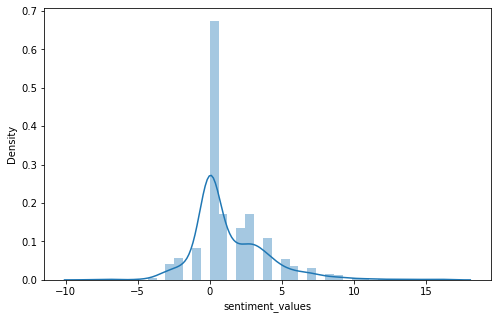

In [85]:
plt.figure(figsize=(8,5))
sn.distplot(sent_df['sentiment_values'])

<AxesSubplot:xlabel='sr_no', ylabel='sentiment_values'>

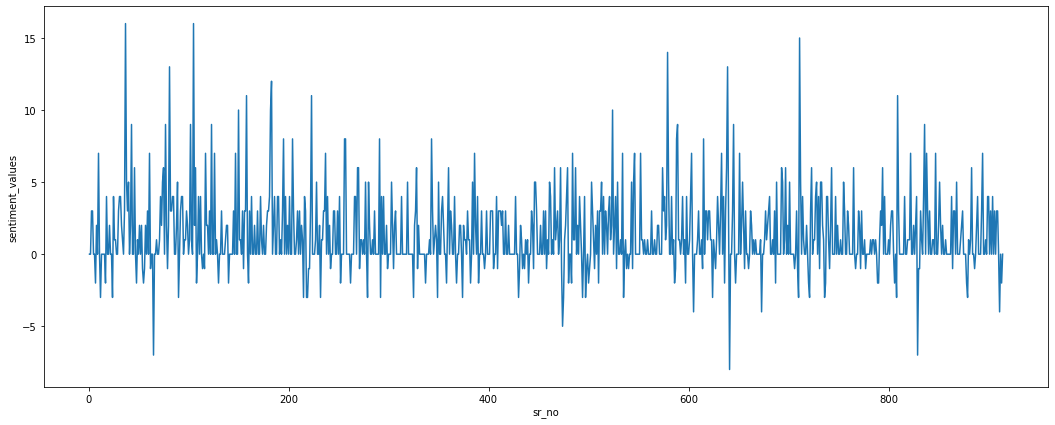

In [93]:
plt.figure(figsize=(18,7))
sn.lineplot(y='sentiment_values', x='sr_no', data=sent_df)

<AxesSubplot:xlabel='words', ylabel='sentiment_values'>

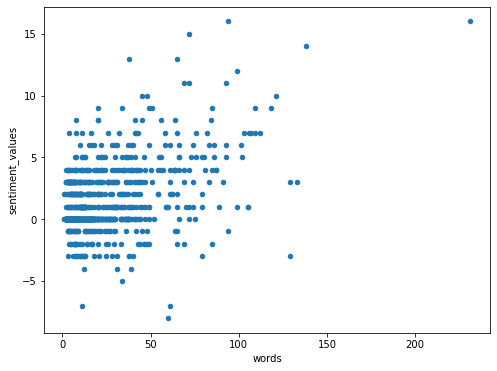

In [94]:
sent_df.plot.scatter(x='words', y='sentiment_values', figsize=(8,6))

In [95]:
# From above scatter diagram we can see that there is no relation between scores and no of words